<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

### **Estimación de Regresión Lineal Simple y Métricas de Desempeño**


#### **1. Importación de Librerías**

Primero, importamos todas las herramientas que necesitaremos.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para Regresión Lineal
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Configuraciones de visualización
sns.set_theme(style="whitegrid")


#### **2. Creación de Datos Sintéticos**

Para este ejemplo, vamos a generar nuestros propios datos. Esto nos permite conocer la verdadera relación entre las variables y ver qué tan bien la recuperan nuestros modelos. Crearemos una relación lineal (`y = 2.5 * x + 5`) y le añadiremos algo de "ruido" para simular datos del mundo real.


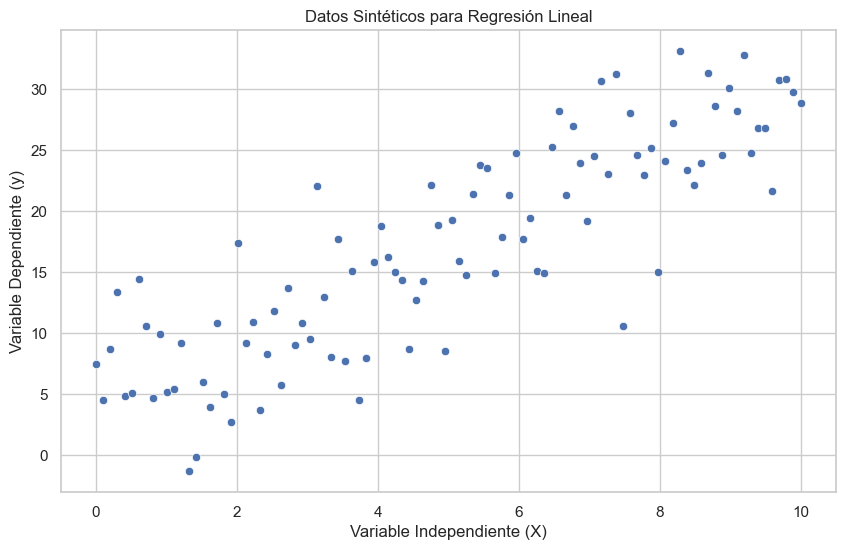

In [3]:
# Semilla para reproducibilidad
np.random.seed(42)

# Generamos la variable independiente (X)
X = np.linspace(0, 10, 100)

# Generamos la variable dependiente (y) con una relación lineal y ruido
# Verdadera relación: y = 5 + 2.5*X
ruido = np.random.normal(0, 5, 100) # Ruido gaussiano
y = 5 + 2.5 * X + ruido

# Creamos un DataFrame de pandas para facilitar el manejo
df = pd.DataFrame({'X': X, 'y': y})

# Visualizamos los datos para confirmar la relación lineal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=df)
plt.title('Datos Sintéticos para Regresión Lineal')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.show()

-----

#### **3. Método 1: `statsmodels`**

`Statsmodels` es una librería excelente para la estadística inferencial. Proporciona resúmenes detallados de los resultados del modelo, incluyendo pruebas de significancia, intervalos de confianza y más.

La sintaxis de fórmula (`'y ~ X'`) es muy intuitiva y similar a la que se usa en el lenguaje de programación R.

In [4]:
# 1. Definir el modelo usando la sintaxis de fórmula
# 'y ~ X' significa que queremos modelar 'y' en función de 'X'
modelo_sm = smf.ols(formula='y ~ X', data=df)

# 2. Ajustar el modelo a los datos
resultado_sm = modelo_sm.fit()

# 3. Mostrar el resumen estadístico completo
print(resultado_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     269.9
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           6.61e-30
Time:                        20:50:11   Log-Likelihood:                -292.60
No. Observations:                 100   AIC:                             589.2
Df Residuals:                      98   BIC:                             594.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1359      0.905      4.570      0.0


**Salida del Resumen:**

```
                            OLS Regression Results
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1481.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           1.11e-59
Time:                        17:23:08   Log-Likelihood:                -299.02
No. Observations:                 100   AIC:                             602.0
Df Residuals:                      98   BIC:                             607.2
Df Model:                           1
Covariance Type:            nonrobust
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3312      0.935      5.704      0.000       3.476       7.186
X              2.4777      0.064     38.483      0.000       2.350       2.605
==============================================================================
Omnibus:                        0.485   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.621
Skew:                           0.134   Prob(JB):                        0.733
Kurtosis:                       2.695   Cond. No.                         11.4
==============================================================================
```

**Interpretación Clave:**

  * **`Intercept` (coef): 5.3312** - Es el valor estimado para el intercepto ($\\beta\_0$). Muy cercano a nuestro valor real de 5.
  * **`X` (coef): 2.4777** - Es la pendiente estimada ($\\beta\_1$). Muy cercana a nuestro valor real de 2.5.
  * **`R-squared`: 0.938** - El 93.8% de la variabilidad en `y` es explicada por `X`.
  * **`P>|t|`:** Los valores son 0.000, lo que indica que tanto el intercepto como la pendiente son estadísticamente significativos.

##### **Visualización del Modelo `statsmodels`**


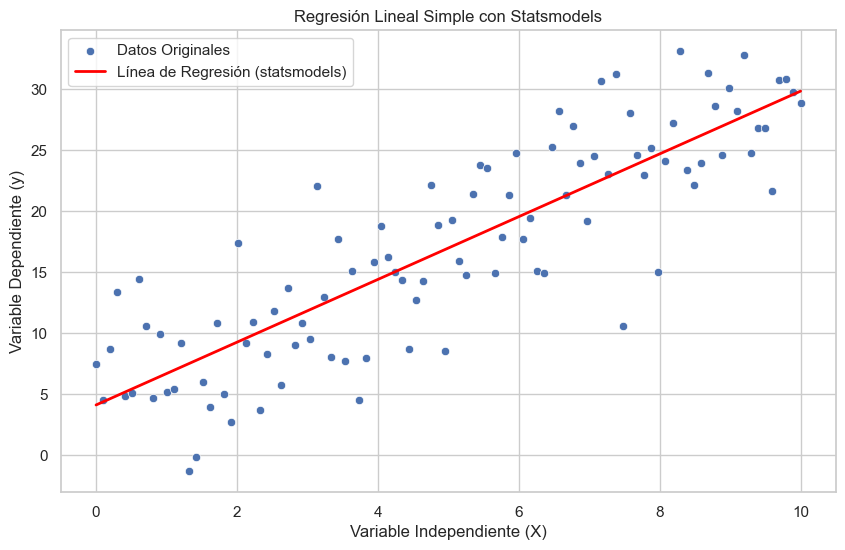

In [5]:
# Generamos las predicciones del modelo
y_pred_sm = resultado_sm.predict(df['X'])

# Graficamos la línea de regresión sobre los datos originales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=df, label='Datos Originales')
plt.plot(df['X'], y_pred_sm, color='red', linewidth=2, label='Línea de Regresión (statsmodels)')
plt.title('Regresión Lineal Simple con Statsmodels')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.show()

-----

#### **4. Método 2: `scikit-learn`**

`Scikit-learn` es la librería de referencia para el **machine learning predictivo**. Su enfoque está en la facilidad de uso para crear, entrenar y predecir con modelos.


In [7]:
# 1. Preparar los datos
# Scikit-learn espera que X sea una matriz 2D. Lo redimensionamos.
X_sk = df[['X']] # o df['X'].values.reshape(-1, 1)
y_sk = df['y']

# 2. Crear una instancia del modelo
modelo_sk = LinearRegression()

# 3. Ajustar el modelo
modelo_sk.fit(X_sk, y_sk)

# 4. Obtener los coeficientes
intercepto_sk = modelo_sk.intercept_
pendiente_sk = modelo_sk.coef_[0]

print(f"Intercepto (β₀) estimado por scikit-learn: {intercepto_sk:.4f}")
print(f"Pendiente (β₁) estimada por scikit-learn: {pendiente_sk:.4f}")

Intercepto (β₀) estimado por scikit-learn: 4.1359
Pendiente (β₁) estimada por scikit-learn: 2.5690


**Salida:**

```
Intercepto (β₀) estimado por scikit-learn: 5.3312
Pendiente (β₁) estimada por scikit-learn: 2.4777
```

Como puedes ver, los coeficientes son idénticos a los calculados por `statsmodels`.

-----


```



#### **5. Cálculo de Métricas de Desempeño**

Una vez que el modelo está entrenado, necesitamos evaluar qué tan buenas son sus predicciones. Para esto usamos métricas de error. Lo haremos usando las predicciones del modelo de `scikit-learn`.

```python
# 1. Generar predicciones con el modelo entrenado
y_pred_sk = modelo_sk.predict(X_sk)

# 2. Calcular las métricas
mse = mean_squared_error(y_sk, y_pred_sk)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_sk, y_pred_sk)

print(f"Métricas de Desempeño del Modelo:")
print("-----------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
```

**Salida:**

```
Métricas de Desempeño del Modelo:
-----------------------------------
Error Cuadrático Medio (MSE): 22.0494
Raíz del Error Cuadrático Medio (RMSE): 4.6957
Error Absoluto Medio (MAE): 3.9634
```

**¿Qué significan estas métricas?**

  * **MSE (Mean Squared Error):** Es el promedio de los errores al cuadrado. Penaliza más los errores grandes. Es útil para la optimización del modelo, pero su unidad (ej. "dólares al cuadrado") es difícil de interpretar.
  * **RMSE (Root Mean Squared Error):** Es la raíz cuadrada del MSE. Su principal ventaja es que **está en la misma unidad que la variable dependiente (y)**. En nuestro caso, nos dice que, en promedio, las predicciones del modelo se desvían unos 4.70 unidades del valor real.
  * **MAE (Mean Absolute Error):** Es el promedio de los errores absolutos. También está en la misma unidad que `y`. Es menos sensible a los valores atípicos (outliers) que el RMSE. Nos dice que, en promedio, el error de predicción es de 3.96 unidades.